<a href="https://colab.research.google.com/github/kiamaikocoders/Pipelines/blob/main/Zack.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Building a Data Pipeline with Python**


> The pipeline will focus on ingesting data, transforming it, and loading it (ETL), with the option to visualize the data and even apply machine learning models

I used Prefect 2.x to manage a basic data pipeline that fetches, transforms, loads, and visualizes data





> Author [Zachariah Komu](https://github.com/kiamaikocoders/Pipelines/blob/main/Zack.ipynb)







In [15]:
!pip install prefect
!pip install gspread

In [23]:
!pip install --upgrade prefect

In [6]:
import pandas as pd
import requests

# Load data from a sample API (JSON response)
url = "https://api.exchangerate-api.com/v4/latest/USD"
response = requests.get(url)
data = response.json()

# Convert JSON data to a pandas DataFrame
df = pd.DataFrame(list(data['rates'].items()), columns=['Currency', 'Exchange Rate'])
df.head()


,Currency,Exchange Rate
0,USD,1.00
1,AED,3.67
2,AFN,68.64
3,ALL,89.58
4,AMD,386.97


# Data Transformation (Efficient Data Processing)
Use pandas for data manipulation, cleaning, and transformations. We’ll demonstrate handling missing data and scaling numeric values, which are common tasks in data pipelines.

In [7]:
# Simple Transformation: Scaling the Exchange Rate (just for demo purposes)
df['Scaled Exchange Rate'] = df['Exchange Rate'] * 100

# Display the transformed data
df.head()


,Currency,Exchange Rate,Scaled Exchange Rate
0,USD,1.00,100.0
1,AED,3.67,367.0
2,AFN,68.64,6864.0
3,ALL,89.58,8958.0
4,AMD,386.97,38697.0


#  Data Storage (Using Google Sheets as Database for Simplicity)
Since Colab works well with Google services, let’s store the data in Google Sheets as a mock database (cloud storage). we can easily access Google Sheets using the gspread library.

In [8]:
# Install the library
!pip install --upgrade gspread

# Import the library
from google.colab import auth
import gspread
from google.auth import default

# Authenticate with Google
auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)

# Data Visualization
we shall visualize the data directly in Colab using matplotlib or seaborn to demonstrate pipeline completion and validate the data output.

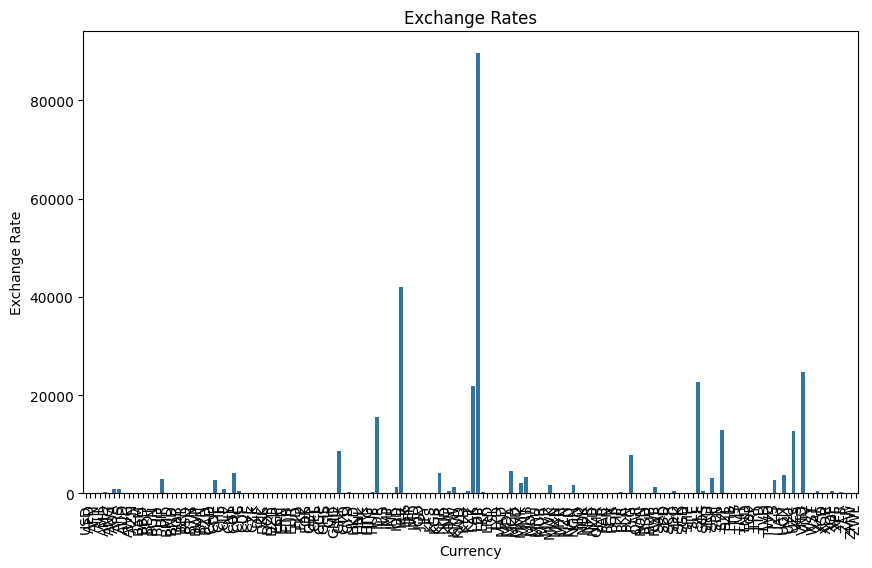

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the exchange rates
plt.figure(figsize=(10, 6))
sns.barplot(x='Currency', y='Exchange Rate', data=df)
plt.xticks(rotation=90)
plt.title('Exchange Rates')
plt.show()


# Machine Learning Model (Optional for Prediction)
For more efficiency, we can extend this pipeline by applying a machine learning model. Colab’s free GPU support makes it ideal for running models.

we shall train a simple linear regression model using scikit-learn to predict a scaled value for exchange rates.

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Create some mock features (for demo) - in practice, you'd use relevant features
df['Feature'] = range(1, len(df) + 1)

# Split the data into training and testing sets
X = df[['Feature']]
y = df['Scaled Exchange Rate']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Display model predictions
predicted_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
predicted_df.head()


,Actual,Predicted
158,25017.0,277450.287287
109,373.0,218494.703431
131,317551.0,244964.557407
55,20904.0,153523.243672
94,3972.0,200447.075721


from matplotlib import pyplot as plt
_df_0['Actual'].plot(kind='hist', bins=20, title='Actual')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Predicted'].plot(kind='hist', bins=20, title='Predicted')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2.plot(kind='scatter', x='Actual', y='Predicted', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['Actual'].plot(kind='line', figsize=(8, 4), title='Actual')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_4['Predicted'].plot(kind='line', figsize=(8, 4), title='Predicted')
plt.gca().spines[['top', 'right']].set_visible(False)

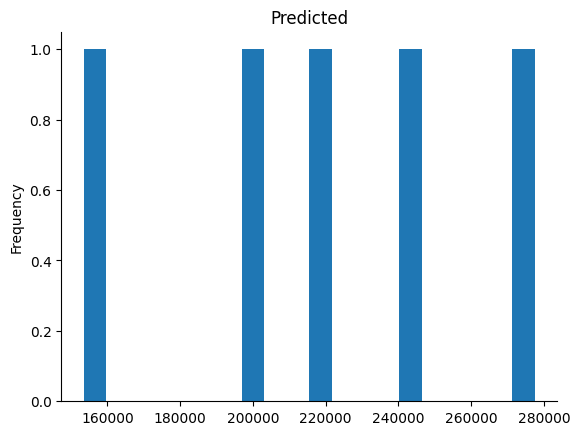

In [29]:
from matplotlib import pyplot as plt
_df_1['Predicted'].plot(kind='hist', bins=20, title='Predicted')
plt.gca().spines[['top', 'right',]].set_visible(False)

# Orchestrating the Pipeline (Using Prefect in Colab)
We shall introduce pipeline orchestration, Prefect works well with Colab. Prefect allows us to create, schedule, and monitor data pipelines efficiently.



23:45:00.650 | INFO    | prefect.engine - Created flow run 'chestnut-smilodon' for flow 'etl-pipeline'

23:45:00.912 | INFO    | Task run 'fetch_data-932' - Created task run 'fetch_data-932' for task 'fetch_data'

23:45:01.211 | INFO    | Task run 'fetch_data-932' - Finished in state Completed()

23:45:01.389 | INFO    | Task run 'transform_data-103' - Created task run 'transform_data-103' for task 'transform_data'

23:45:01.408 | INFO    | Task run 'transform_data-103' - Finished in state Completed()

23:45:01.527 | INFO    | Task run 'load_data-4d6' - Created task run 'load_data-4d6' for task 'load_data'

Data loaded successfully!
  Currency  Exchange Rate  Scaled Exchange Rate
0      USD           1.00                 100.0
1      AED           3.67                 367.0
2      AFN          68.64                6864.0
3      ALL          89.58                8958.0
4      AMD         386.97               38697.0


23:45:01.550 | INFO    | Task run 'load_data-4d6' - Finished in state Completed()

23:45:01.691 | INFO    | Task run 'visualize_data-32e' - Created task run 'visualize_data-32e' for task 'visualize_data'

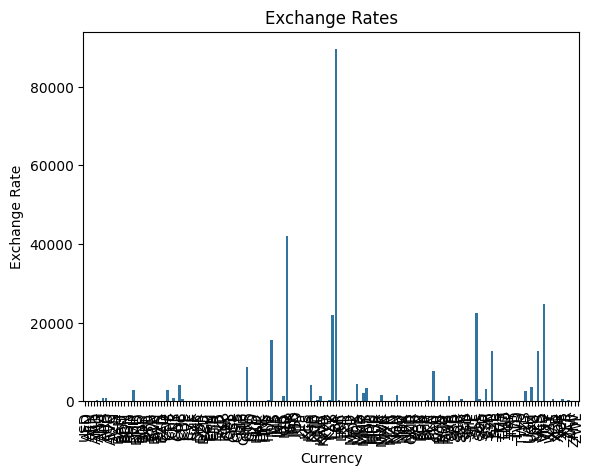

23:45:03.264 | INFO    | Task run 'visualize_data-32e' - Finished in state Completed()

23:45:03.344 | INFO    | Flow run 'chestnut-smilodon' - Finished in state Completed()

In [28]:
from prefect import flow, task
import requests
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define tasks
@task
def fetch_data():
    url = "https://api.exchangerate-api.com/v4/latest/USD"
    response = requests.get(url)
    return pd.DataFrame(list(response.json()['rates'].items()), columns=['Currency', 'Exchange Rate'])

@task
def transform_data(df):
    df['Scaled Exchange Rate'] = df['Exchange Rate'] * 100
    return df

@task
def load_data(df_cleaned):
    # Simulating loading data (e.g., to a database or Google Sheets)
    print("Data loaded successfully!")
    print(df_cleaned.head())  # Display a few rows to confirm the data was loaded

@task
def visualize_data(df_cleaned):
    sns.barplot(x='Currency', y='Exchange Rate', data=df_cleaned)
    plt.xticks(rotation=90)
    plt.title('Exchange Rates')
    plt.show()

# Define the flow using @flow decorator for Prefect 2.x
@flow
def etl_pipeline():
    data = fetch_data()
    transformed_data = transform_data(data)
    load_data(transformed_data)
    visualize_data(transformed_data)

# Run the pipeline
etl_pipeline()


# Objective of the Pipeline:

I wanted to build a simple and efficient ETL (Extract, Transform, Load) pipeline that:

* **Fetches data**: from an external source (an API).

* **Transforms** the data by adding a calculated column.

* **Loads **the transformed data (simulated in this case by printing it, but in practice, you could load it into a database or cloud storage).

* **Visualizes** the data to ensure the pipeline has processed the data correctly.


> The purpose of using Prefect is to orchestrate this workflow and manage the tasks, ensuring each step runs in sequence and can be monitored easily.



# Key Components of the Pipeline:
**@task Decorators:**

* We defined tasks using the @task decorator provided by Prefect. Each task represents one stage of the ETL pipeline.

* Tasks in Prefect are essentially Python functions that Prefect monitors, executes, and manages as part of the pipeline.

**Task Breakdown:**

* **fetch_data:** Fetches data from an external API (exchange rates in this case).

* **transform_data:** Performs simple data transformations, such as scaling the exchange rates.
* **load_data:** Simulates loading data into a database or cloud storage.

* **visualize_data:** Generates a visualization to confirm the data has been processed correctly.
Flow:

* In Prefect 2.x, a flow is the overall process that manages the sequence of tasks.

* We used the @flow decorator to define the etl_pipeline function, which represents the entire pipeline. The tasks are called sequentially within the flow.

* Flow Breakdown:

* **etl_pipeline:** This flow calls each task in order: first fetching the data, then transforming it, followed by loading the data, and finally visualizing it.

 **What we Achieved**

* **Orchestration:** Prefect 2.x allows us to manage the ETL pipeline efficiently. We can track the execution of each task, monitor the flow, and handle errors if they occur (though in this demo we did not add advanced error handling).

* **Modularity:** By breaking the ETL pipeline into separate tasks (fetching, transforming, loading, and visualizing), we created a modular and reusable pipeline. Each task can be updated or replaced without affecting the other tasks.

* **Scalability:** This basic pipeline can be extended to handle more complex datasets, transformations, and storage backends. You can integrate it with cloud storage, databases, and even add machine learning models for more advanced data processing.

* **Visualization:** By adding a visualization step, we ensured that the data processing result could be easily inspected and validated at the end of the pipeline.

**Potential Improvements:**

*  **Database Integration:** The load_data step can be modified to store the data in Google Sheets, Google Cloud Storage, PostgreSQL, or any other storage service.
* **Error Handling:**  You could add error handling and logging for each task, ensuring the pipeline can recover from failures or report issues.
* **Scheduling and Automation:** Prefect also allows you to schedule the pipeline to run at regular intervals (e.g., daily, weekly) and automate the entire data workflow.

>> This approach ensures that your ETL pipeline is efficient, scalable, and easily maintainable using a powerful orchestration tool like Prefect.